# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210609_batch_OLSm_48019prodigal.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [360]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (13, 8)

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

## Functions

In [361]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):
    
    def template_checker(HEX):
        submission_df = (HEX["CODIGO MUNICIPIO"].astype("string") + HEX["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        template_df = (template["CODIGO MUNICIPIO"].astype("string") + template["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        check_df = pd.DataFrame({"submission_df":submission_df,"template_df":template_df})
        check_df["check"] = check_df.submission_df == check_df.template_df
        if (check_df.check == False).any():
            pd.options.display.max_rows = 112
            return check_df.loc[check_df.check == False,:]
        else:  
            return "All Municipality Names and Codes to be submitted match the Template"
    
    print("Submission form Shape is", HEX.shape)
    print("Number of Municipalities is", HEX["CODIGO MUNICIPIO"].nunique())
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

    assert HEX.shape == (112, 3), "Error: Shape is incorrect."
    assert HEX["CODIGO MUNICIPIO"].nunique() == 112, "Error: Number of unique municipalities is correct."    
    return template_checker(HEX)

## Get the data

In [362]:
QUEEN_train = pd.read_csv('../Feeder_months/WBds03_QUEENtrainMONTHS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_months/WBds03_QUEENpredictMONTHS.csv', sep=',')

clustersMario = pd.read_csv("../auxiliary_files/WBds_CLUSTERSnests.csv")

template = pd.read_csv("../../../Input_open_data/ds01_PLANTILLA-RETO-AVISPAS-KOPURU.csv",sep=";", encoding="utf-8")

In [363]:
#QUEEN_predict.isnull().sum()

In [364]:
QUEEN_train.shape

(2688, 43)

In [365]:
QUEEN_predict.shape

(1344, 43)

## Add in more Clusters (nest amount clusters)

In [366]:
QUEEN_train = pd.merge(QUEEN_train, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])

In [367]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [368]:
QUEEN_train.shape

(2688, 44)

In [369]:
QUEEN_predict.shape

(1344, 44)

In [370]:
#QUEEN_train.isnull().sum()

In [371]:
#QUEEN_predict.isnull().sum()

In [372]:
QUEEN_train.Cluster.value_counts()

0.0    1584
2.0     984
1.0      96
4.0      24
Name: Cluster, dtype: int64

## Determine feature importance

In [373]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code', 'station_name', 'year'])

In [374]:
y = QUEEN_train['NESTS']

In [375]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [376]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: month, Score: 1.54334
Feature: year_offset, Score: -1.62404
Feature: colonies_amount, Score: 1.68467
Feature: food_fruit, Score: 2.27094
Feature: food_apple, Score: -1.09452
Feature: food_txakoli, Score: 1.16425
Feature: food_kiwi, Score: -0.06580
Feature: food_pear, Score: 0.38219
Feature: food_blueberry, Score: 1.24410
Feature: food_raspberry, Score: 1.12594
Feature: weath_days_frost, Score: 0.51534
Feature: weath_humidity, Score: 1.47397
Feature: weath_maxLevel, Score: 1.83954
Feature: weath_midLevel, Score: -1.59402
Feature: weath_minLevel, Score: -0.90977
Feature: weath_days_rain, Score: -0.59735
Feature: weath_days_rain1mm, Score: 0.44514
Feature: weath_accuRainfall, Score: 1.63346
Feature: weath_10minRainfall, Score: -0.86744
Feature: weath_1dayRainfall, Score: -0.99070
Feature: weath_solar, Score: 0.04989
Feature: weath_meanTemp, Score: -9.04830
Feature: weath_maxTemp, Score: 0.54039
Feature: weath_maxMeanTemp, Score: 3.90312
Feature: weath_minTemp, Score: 9.47661
Feat

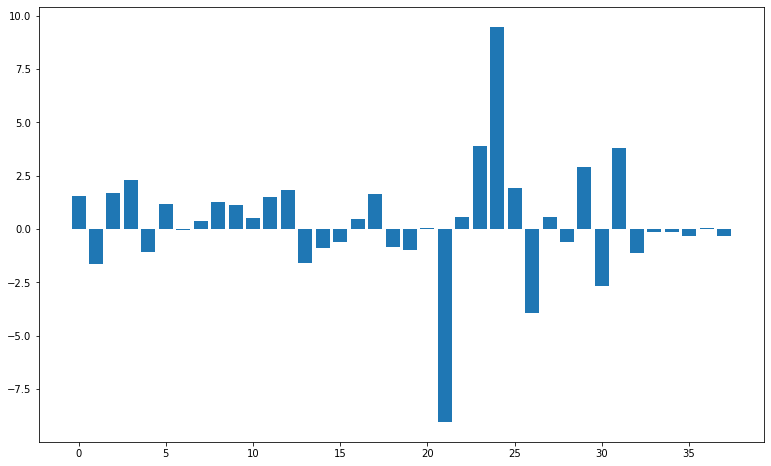

In [377]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [378]:
for i,v in enumerate(importance):
    if abs(v) > 1:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: month, Score: 1.54
Feature: year_offset, Score: -1.62
Feature: colonies_amount, Score: 1.68
Feature: food_fruit, Score: 2.27
Feature: food_apple, Score: -1.09
Feature: food_txakoli, Score: 1.16
Feature: food_blueberry, Score: 1.24
Feature: food_raspberry, Score: 1.13
Feature: weath_humidity, Score: 1.47
Feature: weath_maxLevel, Score: 1.84
Feature: weath_midLevel, Score: -1.59
Feature: weath_accuRainfall, Score: 1.63
Feature: weath_meanTemp, Score: -9.05
Feature: weath_maxMeanTemp, Score: 3.90
Feature: weath_minTemp, Score: 9.48
Feature: weath_meanWindM, Score: 1.94
Feature: weath_maxWindM, Score: -3.92
Feature: cluster_size, Score: 2.92
Feature: cluster_cosmo, Score: -2.69
Feature: cluster_survive, Score: 3.81
Feature: cluster_food, Score: -1.14


## Train the model

### With the variables suggested by the Feature Importance method

In [379]:
model = ols('NESTS ~ month + colonies_amount + food_fruit + food_apple + food_txakoli + food_blueberry + food_raspberry + weath_humidity + weath_maxLevel + weath_midLevel + weath_accuRainfall + weath_maxMeanTemp + weath_minTemp + weath_meanWindM + weath_maxWindM + C(cluster_cosmo) + C(cluster_size) + C(cluster_survive) + C(cluster_food)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     88.72
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          9.26e-298
Time:                        17:53:58   Log-Likelihood:                -6577.2
No. Observations:                2688   AIC:                         1.320e+04
Df Residuals:                    2665   BIC:                         1.334e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### Backward elimination

In [380]:
model = ols('NESTS ~ month + colonies_amount + food_apple + food_txakoli + food_blueberry + food_raspberry + weath_humidity + weath_accuRainfall + weath_maxMeanTemp + weath_meanWindM + weath_maxWindM + C(cluster_cosmo) + C(cluster_size) + C(cluster_food)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     114.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.53e-301
Time:                        17:53:59   Log-Likelihood:                -6580.2
No. Observations:                2688   AIC:                         1.320e+04
Df Residuals:                    2670   BIC:                         1.330e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.33

## Predict 2020's nests

In [381]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0       0.814290
1       0.852071
2       1.104448
3       1.635642
4       2.296635
          ...   
1339    2.382078
1340    2.303421
1341    2.284491
1342    2.314458
1343    1.764163
Length: 1344, dtype: float64

In [382]:
y_2020.sum()

2992.0886037186615

In [383]:
# Take any municipality/month resulting in NESTS < 0 to = 0

y_2020[y_2020 < 0] = 0
y_2020

0       0.814290
1       0.852071
2       1.104448
3       1.635642
4       2.296635
          ...   
1339    2.382078
1340    2.303421
1341    2.284491
1342    2.314458
1343    1.764163
Length: 1344, dtype: float64

In [384]:
y_2020.sum()

3082.4390826246654

In [385]:
QUEEN_predict['NESTS'] = y_2020

In [386]:
HEX = QUEEN_predict.loc[:,['municip_code', 'municip_name', 'NESTS']].groupby(by=['municip_code', 'municip_name'], as_index=False).sum()

## Adjust manually for Bilbao 48020 and generate the output

In [387]:
HEX.loc[HEX.municip_code.isin([48020]), 'NESTS'] = 0

In [388]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.000000
21,48022,Karrantza Harana/Valle de Carranza,21.575224
50,48051,Lanestosa,11.137115
70,48071,Muskiz,17.123349
73,48074,Urduña/Orduña,22.149867
87,48088,Ubide,13.337843


In [389]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

In [390]:
check_data(HEX)

Submission form Shape is (112, 3)
Number of Municipalities is 112
The Total 2020 Nests' Prediction is 3059


'All Municipality Names and Codes to be submitted match the Template'

### Export dataset for submission

In [391]:
HEX.to_csv('WaspBusters_20210609_batch-OLSm-48019prodigal.csv', index=False)

## VERSION Manual adjustments

In [392]:
HEX.columns = ['municip_code', 'municip_name', 'NESTS'] # change column names to Spanish (Competition template)

In [393]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051]), 'NESTS'] = [0,0,1,0,1]

In [394]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,0.0
70,48071,Muskiz,1.0
73,48074,Urduña/Orduña,0.0
87,48088,Ubide,1.0


In [395]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

In [396]:
check_data(HEX)

Submission form Shape is (112, 3)
Number of Municipalities is 112
The Total 2020 Nests' Prediction is 2976


'All Municipality Names and Codes to be submitted match the Template'

### Export dataset for submission

In [397]:
HEX.to_csv('WaspBusters_20210609_batch-OLSm-48019prodigal-manual0s.csv', index=False)